#### The script contains:

#### 1. Importing Libraries & Data

#### 2. Data Wrangling

#### 3. Data Cleaning

#### 4. Create Choropleth

#### 1. Import Libraries & Data

In [28]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import folium
import json

In [4]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [6]:
# Import ".json" file for the U.S. 

country_geo = r'/Users/queency_yustiawan/Study/CF/data analyst course/immersion/A6 materials/us-states.json'

In [7]:
# Import data

path = r'/Users/queency_yustiawan/Study/CF/data analyst course/immersion/A6 exercise/Gun Violence Analysis'

df = pd.read_csv (os.path.join(path,'02. Data', 'Prepared Data', 'gun_violence_data_wrangled.csv'), index_col = False)
df

,Unnamed: 0,incident_id,date,day_of_week,day,month,year,state,city_or_county,address,...,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect
0,0,461105,2013-01-01,Tuesday,1,1,2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,...,NaN,0,4,5,0,0,3,1,4,1
1,1,460726,2013-01-01,Tuesday,1,1,2013,California,Hawthorne,13500 block of Cerise Avenue,...,NaN,1,3,4,0,0,1,0,4,1
2,2,478855,2013-01-01,Tuesday,1,1,2013,Ohio,Lorain,1776 East 28th Street,...,2.0,1,3,5,0,0,5,0,3,2
3,3,478925,2013-01-05,Saturday,5,1,2013,Colorado,Aurora,16000 block of East Ithaca Place,...,NaN,4,0,4,0,0,3,1,3,1
4,4,478959,2013-01-07,Monday,7,1,2013,North Carolina,Greensboro,307 Mourning Dove Terrace,...,2.0,2,2,3,1,0,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,239672,1083142,2018-03-31,Saturday,31,3,2018,Louisiana,Rayne,North Riceland Road and Highway 90,...,1.0,0,0,1,0,0,0,1,0,1
239673,239673,1083139,2018-03-31,Saturday,31,3,2018,Louisiana,Natchitoches,247 Keyser Ave,...,1.0,1,0,2,0,0,2,0,1,1
239674,239674,1083151,2018-03-31,Saturday,31,3,2018,Louisiana,Gretna,1300 block of Cook Street,...,1.0,0,1,1,0,0,1,0,1,0
239675,239675,1082514,2018-03-31,Saturday,31,3,2018,Texas,Houston,12630 Ashford Point Dr,...,1.0,1,0,1,0,0,1,0,1,0


In [8]:
df = df.drop(columns=['Unnamed: 0'])

In [9]:
pd.set_option('display.max_columns', None)

df.head()

,incident_id,date,day_of_week,day,month,year,state,city_or_county,address,latitude,longitude,incident_event,incident_shot,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect
0,461105,2013-01-01,Tuesday,1,1,2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,40.3467,-79.8559,Others,Shot - Wounded/Injured,NaN,0,4,5,0,0,3,1,4,1
1,460726,2013-01-01,Tuesday,1,1,2013,California,Hawthorne,13500 block of Cerise Avenue,33.9090,-118.3330,Gang involvement,Shot - Dead,NaN,1,3,4,0,0,1,0,4,1
2,478855,2013-01-01,Tuesday,1,1,2013,Ohio,Lorain,1776 East 28th Street,41.4455,-82.1377,Bar/club incident,Shot - Dead,2.0,1,3,5,0,0,5,0,3,2
3,478925,2013-01-05,Saturday,5,1,2013,Colorado,Aurora,16000 block of East Ithaca Place,39.6518,-104.8020,Drug involvement,Shot - Dead,NaN,4,0,4,0,0,3,1,3,1
4,478959,2013-01-07,Monday,7,1,2013,North Carolina,Greensboro,307 Mourning Dove Terrace,36.1140,-79.9569,Suicide,Shot - Dead,2.0,2,2,3,1,0,2,2,3,1


#### 2. Data Wrangling

In [15]:
# Creating a subset of necessary data

columns = ['incident_id', 'state', 'n_killed', 'n_injured', 'n_victim', 'n_suspect']

In [16]:
df_incident = df[columns]

In [17]:
df_incident.head()

,incident_id,state,n_killed,n_injured,n_victim,n_suspect
0,461105,Pennsylvania,0,4,4,1
1,460726,California,1,3,4,1
2,478855,Ohio,1,3,3,2
3,478925,Colorado,4,0,3,1
4,478959,North Carolina,2,2,3,1


#### 3. Data Cleaning

In [18]:
# Check for missing values

df_incident.isnull().sum()

incident_id    0
state          0
n_killed       0
n_injured      0
n_victim       0
n_suspect      0
dtype: int64

In [19]:
# Check for duplicates

duplicates = df_incident.duplicated()
duplicates.shape

(239677,)

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_killed', ylabel='Count'>

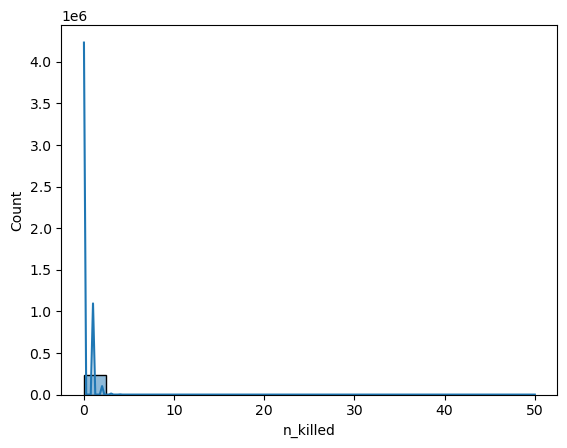

In [20]:
# Extreme value checks

sns.histplot(df_incident['n_killed'], bins=20, kde = True)

In [22]:
# Clean extreme values

df_incident = df_incident[df_incident['n_killed'] < 50] 

# 50 was picked because it is the outlier in this data

In [23]:
df_incident.shape

(239676, 6)

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_suspect', ylabel='Count'>

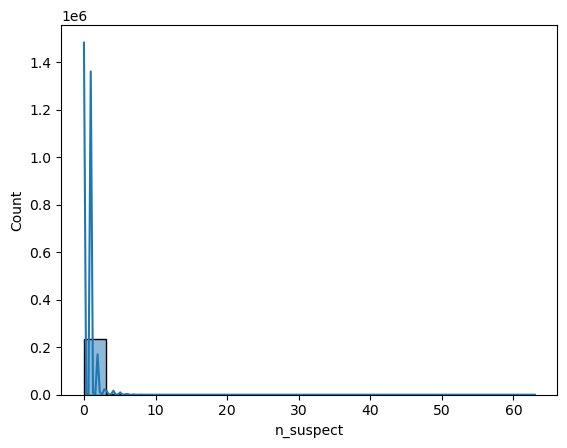

In [36]:
# Extreme value checks

sns.histplot(df_incident['n_suspect'], bins=20, kde = True)

In [38]:
# Clean extreme values

df_incident = df_incident[df_incident['n_suspect'] < 50] 

# 50 was picked because it is the outlier in this data

In [39]:
df_incident.shape

(239674, 7)

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/8k/dxgtncgd49g2ryx410bsc12r0000gn/T/ipykernel_74730/1995878314.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  hist_state.set_xticklabels(hist_state.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Gun Violence Incidents Count in US States')

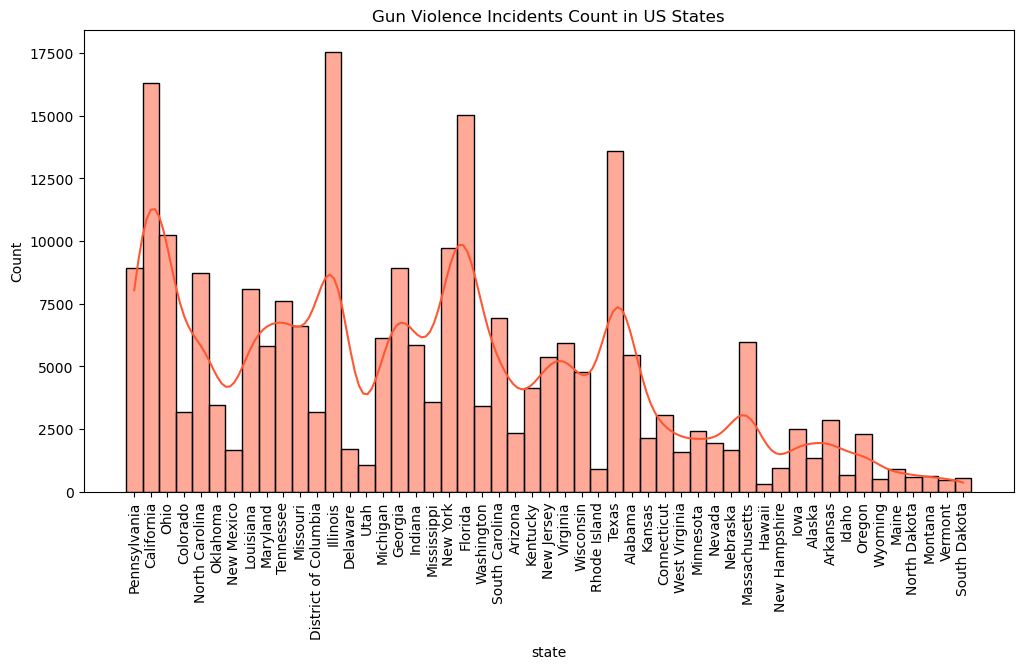

In [41]:
# Create histogram of incident count in each states

plt.figure(figsize=(12, 6))
hist_state = sns.histplot(df_incident['state'],color='#FF5733', kde = True)
hist_state.set_xticklabels(hist_state.get_xticklabels(), rotation=90)
plt.title('Gun Violence Incidents Count in US States')

In [42]:
# Save visualisation

hist_state.figure.savefig(os.path.join(path, '04. Analysis', 'hist_incident_state.png'), bbox_inches='tight')

#### 4. Create Choropleth

In [53]:
#Create state counts dataframe

state_counts = df['state'].value_counts()

In [56]:
df_state_counts = pd.DataFrame({'state': state_counts.index, 'count': state_counts.values})

In [57]:
df_state_counts

,state,count
0,Illinois,17556
1,California,16306
2,Florida,15029
3,Texas,13577
4,Ohio,10244
5,New York,9712
6,Pennsylvania,8929
7,Georgia,8925
8,North Carolina,8739
9,Louisiana,8103


In [63]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_state_counts,
    columns = ['state', 'count'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "incident count").add_to(map)
folium.LayerControl().add_to(map)

map

In [66]:
map.save('Gun_violence_incident_count_choropleth.html')

#### Does the analysis answer any of your existing research questions?

##### Yes, this analysis shows which states has the most gun violence incidents during 2013-2018, which are Illinois, California and Florida.